In [1]:
import torch.utils.data as dt

from misc.processing import *
from misc.displaying import display
from misc.train import train_network
from misc.model_mp_v3 import SegmenterModel

In [2]:
DEVICE_ID = 1
DEVICE = torch.device('cuda:%d' % DEVICE_ID)
torch.cuda.set_device(DEVICE_ID)

In [3]:
train = './d_data/train/'
train_masks = './d_data/train_masks/'
test = './d_data/test/'
test_masks = './d_data/test_masks'

ds = CarvanaDataset(train, train_masks)
ds_test = CarvanaDataset(test, test_masks)
dl = dt.DataLoader(ds, shuffle=True, num_workers=4, batch_size=32)
dl_test = dt.DataLoader(ds_test, shuffle=False, num_workers=1, batch_size=32)

In [4]:
net = SegmenterModel()
schedule = {0:0.001, 70:0.0005, 90:0.0001}
full_loss_train, full_loss_test = train_network(net, dl, n_epoch=100, schedule=schedule)

Learining rate:  0.001
Epoch: 0 | Train loss: 0.017171
Epoch: 1 | Train loss: 0.013745
Epoch: 2 | Train loss: 0.011468
Epoch: 3 | Train loss: 0.010082
Epoch: 4 | Train loss: 0.009090
Epoch: 5 | Train loss: 0.008413
Epoch: 6 | Train loss: 0.007674
Epoch: 7 | Train loss: 0.007314
Epoch: 8 | Train loss: 0.006894
Epoch: 9 | Train loss: 0.006523
Epoch: 10 | Train loss: 0.004417
Epoch: 11 | Train loss: 0.002923
Epoch: 12 | Train loss: 0.002560
Epoch: 13 | Train loss: 0.002375
Epoch: 14 | Train loss: 0.002165
Epoch: 15 | Train loss: 0.002088
Epoch: 16 | Train loss: 0.001992
Epoch: 17 | Train loss: 0.001960
Epoch: 18 | Train loss: 0.001852
Epoch: 19 | Train loss: 0.001806
Epoch: 20 | Train loss: 0.001841
Epoch: 21 | Train loss: 0.001850
Epoch: 22 | Train loss: 0.001780
Epoch: 23 | Train loss: 0.001833
Epoch: 24 | Train loss: 0.001678
Epoch: 25 | Train loss: 0.001885
Epoch: 26 | Train loss: 0.001599
Epoch: 27 | Train loss: 0.001830
Epoch: 28 | Train loss: 0.001654
Epoch: 29 | Train loss: 0.0016

In [5]:
save_model(net, './models/model_mp_3')
save_state(net, './models/state_mp_3')

In [6]:
net = load_state(SegmenterModel, './models/state_mp_3')
net.cuda()

SegmenterModel(
  (downsize): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (conv_h0): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (pool_h): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_m0): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (conv_m1): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (pool_m): MaxPool2d(kernel_size

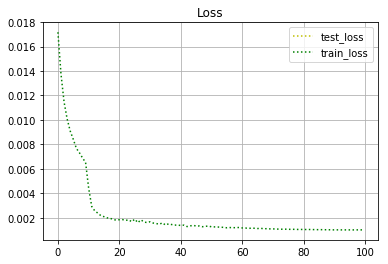

In [7]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.title('Loss')
plt.plot(full_loss_test, 'y:', label = 'test_loss')
plt.plot(full_loss_train, 'g:', label = 'train_loss')
plt.legend()

### Результаты работы

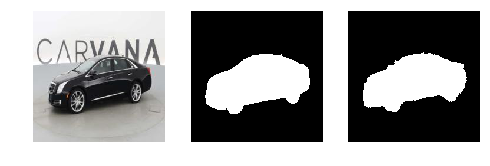

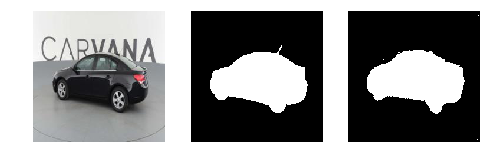

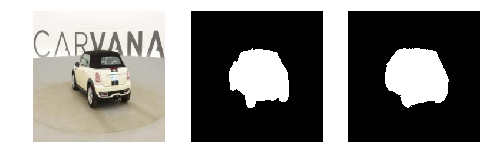

In [17]:
from random import randint
from torch.autograd import Variable

for _ in range(3):
    image, image_mask = ds_test[randint(0, 507)]

    input_ = Variable(image.unsqueeze_(0)).cuda()
    output = net(input_)

    image_mask_guess = class_max(output)
    display((image.squeeze_(0), image_mask, image_mask_guess), figsize=(8,24))